# Do the wavelength study for the hollow glass tube with polymer

Do it for both lossy and non-lossy polymer.  Both with air outside.

In [3]:
import numpy as np
import matplotlib.pyplot as plt


from fiberamp.fiber.microstruct.bragg import BraggExact, plotlogf
from scipy.optimize import newton

# Initialize

In [4]:
n = 200
wls = np.linspace(1.5e-6, 1.585e-6, n+1)
betas1 = np.zeros_like(wls, dtype=complex)
outer = 'h2'
nu = 1

n_air = 1.00027717
n_glass = 1.4388164768221814
n_poly = 1.5

In [5]:
ts = [15*2.7183333333333333e-6, 15*2/3*1e-6, 15*2.7183333333333333e-6, 15*2e-6]
ns = [lambda x:n_air, lambda x:n_glass, lambda x:n_poly, lambda x:n_air]
mats = ['air','glass', 'polymer','air']
maxhs = [10,10,10,10]

In [6]:
for i, wl in enumerate(wls):
    print(5 * ' ' +  + 20 * '-' + '  ' + str(i+1) + '/' + str(n+1) + ': ' +
          'wavelength: ' +  str(wls[i]) + '  ' +  20 * '-' +5 * ' '+'\n')
    
    A = BraggExact(ts=ts, ns=ns , mats=mats,maxhs=maxhs, wl=wl)
    k_low = A.ks[0] * A.scale
    guess = np.array(.9999 * k_low)
    imag = 0
    flag = True
    reduce = 0

    while flag:
        try:
            x0 = np.array(guess + imag*1j)
            beta = newton(A.determinant, x0, args=(nu, outer), tol = 1e-17)
            if beta.real > k_low:
                print("Captured wrong mode, retrying.")
                raise RuntimeError
            elif beta.imag > 0:
                print("Positive imaginary part, retrying.")
                imag = -beta.imag
                guess *= 1/.999995
                raise RuntimeError
            else:
                print("Scaled beta: ", beta, ". Residual of determinant: ", 
                      abs(A.determinant(beta, nu, outer)), '\n\n' )
                imag = beta.imag
                flag=False
        except RuntimeError:
            guess *= .999995
            reduce += 1
            print("scaling guess: " + str(reduce), flush=True)
    betas1[i] = beta
    

     --------------------  1/201: wavelength: 1.5e-06  --------------------     

Boundary names not provided, using default names.
scaling guess: 1
scaling guess: 2
scaling guess: 3
Scaled beta:  (209.47687710288199-8.618780718247911e-06j) . Residual of determinant:  1.8577939237767924e-11 


     --------------------  2/201: wavelength: 1.5004250000000001e-06  --------------------     

Boundary names not provided, using default names.
Scaled beta:  (209.41750594316434-8.44679963847306e-06j) . Residual of determinant:  9.142344269805327e-12 


     --------------------  3/201: wavelength: 1.50085e-06  --------------------     

Boundary names not provided, using default names.
scaling guess: 1
scaling guess: 2
scaling guess: 3
Scaled beta:  (209.35816880002332-8.35254214953984e-06j) . Residual of determinant:  2.8787186803848483e-11 


     --------------------  4/201: wavelength: 1.501275e-06  --------------------     

Boundary names not provided, using default names.
Scaled beta: 

scaling guess: 1
Scaled beta:  (207.77199223296978-0.00039342744885698165j) . Residual of determinant:  1.1991085299042158e-12 


     --------------------  31/201: wavelength: 1.51275e-06  --------------------     

Boundary names not provided, using default names.
Scaled beta:  (207.71272133537622-0.00019173612252902308j) . Residual of determinant:  7.585963564805501e-13 


     --------------------  32/201: wavelength: 1.5131750000000001e-06  --------------------     

Boundary names not provided, using default names.
Scaled beta:  (207.65391401288653-0.00011393558770582919j) . Residual of determinant:  4.4899353265118414e-13 


     --------------------  33/201: wavelength: 1.5136e-06  --------------------     

Boundary names not provided, using default names.
Scaled beta:  (207.59531560121556-7.595538148144566e-05j) . Residual of determinant:  3.218817896630405e-12 


     --------------------  34/201: wavelength: 1.514025e-06  --------------------     

Boundary names not provid

Scaled beta:  (205.97428223895528-1.2695749407708452e-05j) . Residual of determinant:  1.6235925805820565e-12 


     --------------------  62/201: wavelength: 1.5259250000000001e-06  --------------------     

Boundary names not provided, using default names.
Scaled beta:  (205.91686620545275-1.3915215642139534e-05j) . Residual of determinant:  1.6070874313639297e-12 


     --------------------  63/201: wavelength: 1.52635e-06  --------------------     

Boundary names not provided, using default names.
Scaled beta:  (205.85947844767247-1.5449527660152392e-05j) . Residual of determinant:  7.380539350516669e-12 


     --------------------  64/201: wavelength: 1.526775e-06  --------------------     

Boundary names not provided, using default names.
Scaled beta:  (205.80211797639603-1.7399417263162218e-05j) . Residual of determinant:  2.7863422350683947e-11 


     --------------------  65/201: wavelength: 1.5272e-06  --------------------     

Boundary names not provided, using defau

Scaled beta:  (204.2672281692869-1.416755051665275e-05j) . Residual of determinant:  6.860512844689653e-13 


     --------------------  92/201: wavelength: 1.5386750000000001e-06  --------------------     

Boundary names not provided, using default names.
Scaled beta:  (204.2107589789052-1.2975662515898721e-05j) . Residual of determinant:  7.199415076098565e-12 


     --------------------  93/201: wavelength: 1.5391e-06  --------------------     

Boundary names not provided, using default names.
Scaled beta:  (204.15432390005256-1.2020650598185499e-05j) . Residual of determinant:  1.821109084795877e-12 


     --------------------  94/201: wavelength: 1.539525e-06  --------------------     

Boundary names not provided, using default names.
scaling guess: 1
scaling guess: 2
scaling guess: 3
Scaled beta:  (204.0979223229479-1.1254238880916807e-05j) . Residual of determinant:  7.624954831558476e-12 


     --------------------  95/201: wavelength: 1.53995e-06  --------------------   

Scaled beta:  (202.41850365562811-0.0003840939130903661j) . Residual of determinant:  1.3430158702143325e-12 


     --------------------  125/201: wavelength: 1.5527e-06  --------------------     

Boundary names not provided, using default names.
scaling guess: 1
scaling guess: 2
scaling guess: 3
scaling guess: 4
scaling guess: 5
scaling guess: 6
scaling guess: 7
scaling guess: 8
scaling guess: 9
scaling guess: 10
scaling guess: 11
scaling guess: 12
scaling guess: 13
scaling guess: 14
scaling guess: 15
scaling guess: 16
scaling guess: 17
scaling guess: 18
scaling guess: 19
scaling guess: 20
scaling guess: 21
scaling guess: 22
scaling guess: 23
scaling guess: 24
scaling guess: 25
scaling guess: 26
scaling guess: 27
scaling guess: 28
scaling guess: 29
scaling guess: 30
scaling guess: 31
scaling guess: 32
scaling guess: 33
scaling guess: 34
scaling guess: 35
scaling guess: 36
scaling guess: 37
scaling guess: 38
scaling guess: 39
scaling guess: 40
scaling guess: 41
scaling guess: 42
scal

scaling guess: 1
scaling guess: 2
Scaled beta:  (201.09936669044976-9.96900015849577e-06j) . Residual of determinant:  1.9804919409487595e-11 


     --------------------  149/201: wavelength: 1.5629e-06  --------------------     

Boundary names not provided, using default names.
scaling guess: 1
scaling guess: 2
scaling guess: 3
Scaled beta:  (201.04464498507184-9.71780599977034e-06j) . Residual of determinant:  9.839225340267697e-12 


     --------------------  150/201: wavelength: 1.563325e-06  --------------------     

Boundary names not provided, using default names.
scaling guess: 1
scaling guess: 2
scaling guess: 3
scaling guess: 4
Scaled beta:  (200.98995357447842-9.546331489729795e-06j) . Residual of determinant:  1.643525868294023e-12 


     --------------------  151/201: wavelength: 1.56375e-06  --------------------     

Boundary names not provided, using default names.
scaling guess: 1
Scaled beta:  (200.9352922391366-9.449087682014446e-06j) . Residual of determinant: 

scaling guess: 1
scaling guess: 2
scaling guess: 3
scaling guess: 4
scaling guess: 5
scaling guess: 6
scaling guess: 7
scaling guess: 8
scaling guess: 9
scaling guess: 10
scaling guess: 11
scaling guess: 12
scaling guess: 13
scaling guess: 14
scaling guess: 15
scaling guess: 16
scaling guess: 17
Scaled beta:  (199.4523894438887-0.010818035119305206j) . Residual of determinant:  3.764816065126645e-16 


     --------------------  179/201: wavelength: 1.5756500000000001e-06  --------------------     

Boundary names not provided, using default names.
scaling guess: 1
scaling guess: 2
scaling guess: 3
scaling guess: 4
scaling guess: 5
scaling guess: 6
Scaled beta:  (199.3817275357444-0.020179067911005728j) . Residual of determinant:  1.794947322363164e-15 


     --------------------  180/201: wavelength: 1.576075e-06  --------------------     

Boundary names not provided, using default names.
scaling guess: 1
scaling guess: 2
scaling guess: 3
scaling guess: 4
Scaled beta:  (199.36655572

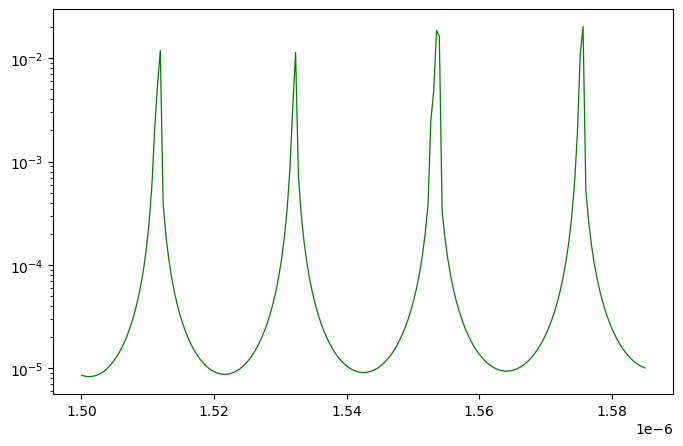

In [8]:
plt.figure(figsize=(8,5))
plt.plot(wls, -betas1.imag, color='green', linewidth=.9)
plt.yscale('log')


# We have double the resonators

Makes sense that we might get more spikes: the resonators are interacting.  What about adding loss to polymer?

# Light Loss Polymer

In [9]:
n = 200
wls = np.linspace(1.5e-6, 1.585e-6, n+1)
betas2 = np.zeros_like(wls, dtype=complex)
outer = 'h2'
nu = 1

n_air = 1.00027717
n_glass = 1.4388164768221814
n_poly = 1.5 - .001j

In [11]:
for i, wl in enumerate(wls):
    print(5 * ' ' +  + 20 * '-' + '  ' + str(i+1) + '/' + str(n+1) + ': ' +
          'wavelength: ' +  str(wls[i]) + '  ' +  20 * '-' +5 * ' '+'\n')
    
    A = BraggExact(ts=ts, ns=ns , mats=mats,maxhs=maxhs, wl=wl)
    k_low = A.ks[0] * A.scale
    guess = np.array(.9999 * k_low)
    imag = 0
    flag = True
    reduce = 0

    while flag:
        try:
            x0 = np.array(guess + imag*1j)
            beta = newton(A.determinant, x0, args=(nu, outer), tol = 1e-17)
            if beta.real > k_low:
                print("Captured wrong mode, retrying.")
                raise RuntimeError
            elif beta.imag > 0:
                print("Positive imaginary part, retrying.")
                imag = -beta.imag
                guess *= 1/.999995
                raise RuntimeError
            else:
                print("Scaled beta: ", beta, ". Residual of determinant: ", 
                      abs(A.determinant(beta, nu, outer)), '\n\n' )
                imag = beta.imag
                flag=False
        except RuntimeError:
            guess *= .999995
            reduce += 1
            print("scaling guess: " + str(reduce), flush=True)
    betas2[i] = beta
    

     --------------------  1/201: wavelength: 1.5e-06  --------------------     

Boundary names not provided, using default names.
scaling guess: 1
Scaled beta:  (209.47687251097463-9.201682742840565e-05j) . Residual of determinant:  3.116837781986855e-11 


     --------------------  2/201: wavelength: 1.5004250000000001e-06  --------------------     

Boundary names not provided, using default names.
scaling guess: 1
scaling guess: 2
Scaled beta:  (209.41750295279434-9.014995932671309e-05j) . Residual of determinant:  3.941671088937939e-11 


     --------------------  3/201: wavelength: 1.50085e-06  --------------------     

Boundary names not provided, using default names.
scaling guess: 1
scaling guess: 2
scaling guess: 3
scaling guess: 4
Scaled beta:  (209.35816730803305-8.906522756348252e-05j) . Residual of determinant:  1.7136920559125863e-11 


     --------------------  4/201: wavelength: 1.501275e-06  --------------------     

Boundary names not provided, using default na

scaling guess: 1
scaling guess: 2
scaling guess: 3
Scaled beta:  (207.71160379546617-0.0009409989240696491j) . Residual of determinant:  3.359920920669204e-12 


     --------------------  32/201: wavelength: 1.5131750000000001e-06  --------------------     

Boundary names not provided, using default names.
scaling guess: 1
scaling guess: 2
scaling guess: 3
scaling guess: 4
Scaled beta:  (207.65326444133373-0.0007326800485194295j) . Residual of determinant:  5.861142372587344e-12 


     --------------------  33/201: wavelength: 1.5136e-06  --------------------     

Boundary names not provided, using default names.
scaling guess: 1
Scaled beta:  (207.59491266105988-0.0005737059186315947j) . Residual of determinant:  3.3409951644082877e-13 


     --------------------  34/201: wavelength: 1.514025e-06  --------------------     

Boundary names not provided, using default names.
Scaled beta:  (207.53657575400305-0.00045659794615462876j) . Residual of determinant:  3.737061958471727e-12

Scaled beta:  (205.9743024004855-0.00012843229227226395j) . Residual of determinant:  1.1443723121245995e-13 


     --------------------  62/201: wavelength: 1.5259250000000001e-06  --------------------     

Boundary names not provided, using default names.
scaling guess: 1
Scaled beta:  (205.9168913097122-0.00013946105865048978j) . Residual of determinant:  4.6881328438572996e-12 


     --------------------  63/201: wavelength: 1.52635e-06  --------------------     

Boundary names not provided, using default names.
Scaled beta:  (205.8595098818556-0.0001530982070534716j) . Residual of determinant:  3.473957094596357e-11 


     --------------------  64/201: wavelength: 1.526775e-06  --------------------     

Boundary names not provided, using default names.
Scaled beta:  (205.8021576856562-0.0001700495505681532j) . Residual of determinant:  1.1051568538070867e-11 


     --------------------  65/201: wavelength: 1.5272e-06  --------------------     

Boundary names not provided, 

scaling guess: 1
Scaled beta:  (204.2107382017672-0.0001314415986249765j) . Residual of determinant:  7.156865665320332e-12 


     --------------------  93/201: wavelength: 1.5391e-06  --------------------     

Boundary names not provided, using default names.
scaling guess: 1
scaling guess: 2
scaling guess: 3
scaling guess: 4
Scaled beta:  (204.15430711670697-0.0001223343746990655j) . Residual of determinant:  5.314812972316825e-11 


     --------------------  94/201: wavelength: 1.539525e-06  --------------------     

Boundary names not provided, using default names.
Scaled beta:  (204.09790878442598-0.00011494219071403195j) . Residual of determinant:  3.243220667393684e-11 


     --------------------  95/201: wavelength: 1.53995e-06  --------------------     

Boundary names not provided, using default names.
scaling guess: 1
Scaled beta:  (204.0415429039906-0.00010897075283386593j) . Residual of determinant:  4.013682624436871e-11 


     --------------------  96/201: waveleng

Scaled beta:  (202.47566056354768-0.0009385920225452368j) . Residual of determinant:  1.5483469796431789e-12 


     --------------------  124/201: wavelength: 1.552275e-06  --------------------     

Boundary names not provided, using default names.
scaling guess: 1
scaling guess: 2
Scaled beta:  (202.42028010780237-0.001188357881486337j) . Residual of determinant:  2.462224636753094e-12 


     --------------------  125/201: wavelength: 1.5527e-06  --------------------     

Boundary names not provided, using default names.
scaling guess: 1
scaling guess: 2
scaling guess: 3
scaling guess: 4
scaling guess: 5
scaling guess: 6
scaling guess: 7
scaling guess: 8
Scaled beta:  (202.36505558064312-0.0014461581466066419j) . Residual of determinant:  4.602226392649488e-13 


     --------------------  126/201: wavelength: 1.553125e-06  --------------------     

Boundary names not provided, using default names.
scaling guess: 1
scaling guess: 2
scaling guess: 3
Scaled beta:  (202.310004348954

scaling guess: 1
Scaled beta:  (200.71694783136837-9.643607984656658e-05j) . Residual of determinant:  3.860944756514829e-11 


     --------------------  156/201: wavelength: 1.565875e-06  --------------------     

Boundary names not provided, using default names.
Scaled beta:  (200.66243538276058-9.886524199918188e-05j) . Residual of determinant:  6.907735677277721e-11 


     --------------------  157/201: wavelength: 1.5663000000000001e-06  --------------------     

Boundary names not provided, using default names.
Scaled beta:  (200.60795191889844-0.00010209924512896885j) . Residual of determinant:  1.2135329571346418e-11 


     --------------------  158/201: wavelength: 1.566725e-06  --------------------     

Boundary names not provided, using default names.
Scaled beta:  (200.55349724708728-0.00010623335447233828j) . Residual of determinant:  3.636967012523258e-11 


     --------------------  159/201: wavelength: 1.5671500000000001e-06  --------------------     

Boundary n

Scaled beta:  (199.09574858714632-0.0004305927609421333j) . Residual of determinant:  1.15559222574166e-11 


     --------------------  186/201: wavelength: 1.578625e-06  --------------------     

Boundary names not provided, using default names.
scaling guess: 1
scaling guess: 2
Scaled beta:  (199.04207854483354-0.0003573124903423372j) . Residual of determinant:  7.67832014435585e-12 


     --------------------  187/201: wavelength: 1.5790500000000002e-06  --------------------     

Boundary names not provided, using default names.
scaling guess: 1
scaling guess: 2
Scaled beta:  (198.9884403958063-0.0003016375275940876j) . Residual of determinant:  7.476349631544304e-12 


     --------------------  188/201: wavelength: 1.579475e-06  --------------------     

Boundary names not provided, using default names.
scaling guess: 1
scaling guess: 2
scaling guess: 3
scaling guess: 4
Scaled beta:  (198.9348350784528-0.00025875237072584353j) . Residual of determinant:  1.8374383327043352e-1

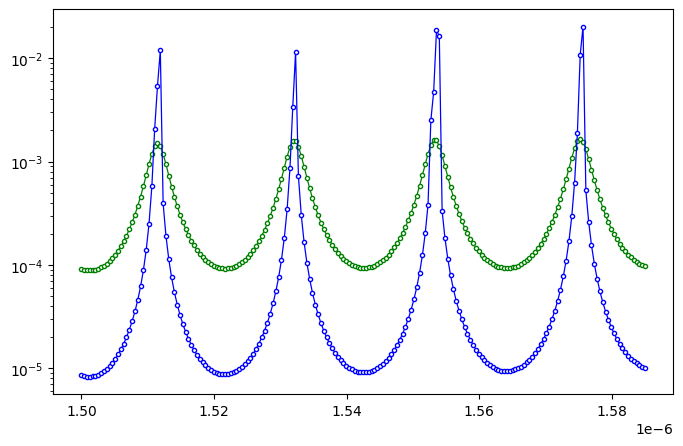

In [12]:
plt.figure(figsize=(8,5))
plt.plot(wls, -betas2.imag, color='green', linewidth=.9, marker='o', 
        markersize=3, markerfacecolor='white')
plt.plot(wls, -betas1.imag, color='blue', linewidth=.9, marker='o', 
        markersize=3, markerfacecolor='white')

plt.yscale('log')

In [ ]:
ls

In [42]:
# np.save('k_001_subint_150_1585_201_scaled_betas', betas2)

In [43]:
ls

driver.py                                   Mesh_Check.ipynb
graph.py                                    modes/
k_001_scaled_betas.npy                      outputs/
k_001_subint_150_1585_201_scaled_betas.npy  Wavelength_Study.ipynb
medium.sh*


# Medium Loss polymer

In [ ]:
n = 300
wls = np.linspace(1.4e-6, 2e-6, n+1)
betas3 = np.zeros_like(wls, dtype=complex)
outer = 'h2'
nu = 1

n_air = 1.00027717
n_glass = 1.4388164768221814
n_poly = 1.5 - .005j

In [ ]:
for i, wl in enumerate(wls):
    print(5 * ' ' +  + 20 * '-' + '  ' + str(i+1) + '/' + str(n+1) + ': ' +
          'wavelength: ' +  str(wls[i]) + '  ' +  20 * '-' +5 * ' '+'\n')
    
    A = BraggExact(ts=ts, ns=ns , mats=mats,maxhs=maxhs, wl=wl)
    k_low = A.ks[0] * A.scale
    guess = np.array(.9999 * k_low)
    imag = 0
    flag = True
    reduce = 0

    while flag:
        try:
            x0 = np.array(guess + imag*1j)
            beta = newton(A.determinant, x0, args=(nu, outer), tol = 1e-17)
            if beta.real > k_low:
                print("Captured wrong mode, retrying.")
                raise RuntimeError
            elif beta.imag > 0:
                print("Positive imaginary part, retrying.")
                imag = -beta.imag
                guess *= 1/.999995
                raise RuntimeError
            else:
                print("Scaled beta: ", beta, ". Residual of determinant: ", 
                      abs(A.determinant(beta, nu, outer)), '\n\n' )
                imag = beta.imag
                flag=False
        except RuntimeError:
            guess *= .999995
            reduce += 1
            print("scaling guess: " + str(reduce), flush=True)
    betas3[i] = beta
    

In [ ]:
%matplotlib notebook
plt.figure(figsize=(8,5))
plt.plot(wls, -betas2.imag, color='green', linewidth=.9)
plt.plot(wls, -betas1.imag, color='blue', linewidth=.9)
plt.plot(wls, -betas3.imag, color='red', linewidth=.9)

plt.yscale('log')

# High Loss Polymer

In [ ]:
n = 300
wls = np.linspace(1.4e-6, 2e-6, n+1)
betas4 = np.zeros_like(wls, dtype=complex)
outer = 'h2'
nu = 1

n_air = 1.00027717
n_glass = 1.4388164768221814
n_poly = 1.5 - .01j

In [ ]:
for i, wl in enumerate(wls):
    print(5 * ' ' +  + 20 * '-' + '  ' + str(i+1) + '/' + str(n+1) + ': ' +
          'wavelength: ' +  str(wls[i]) + '  ' +  20 * '-' +5 * ' '+'\n')
    
    A = BraggExact(ts=ts, ns=ns , mats=mats,maxhs=maxhs, wl=wl)
    k_low = A.ks[0] * A.scale
    guess = np.array(.9999 * k_low)
    imag = 0
    flag = True
    reduce = 0

    while flag:
        try:
            x0 = np.array(guess + imag*1j)
            beta = newton(A.determinant, x0, args=(nu, outer), tol = 1e-17)
            if beta.real > k_low:
                print("Captured wrong mode, retrying.")
                raise RuntimeError
            elif beta.imag > 0:
                print("Positive imaginary part, retrying.")
                imag = -beta.imag
                guess *= 1/.999995
                raise RuntimeError
            else:
                print("Scaled beta: ", beta, ". Residual of determinant: ", 
                      abs(A.determinant(beta, nu, outer)), '\n\n' )
                imag = beta.imag
                flag=False
        except RuntimeError:
            guess *= .999995
            reduce += 1
            print("scaling guess: " + str(reduce), flush=True)
    betas4[i] = beta
    

In [ ]:
%matplotlib notebook
plt.figure(figsize=(8,5))
plt.plot(wls, -betas2.imag, color='green', linewidth=.9)
plt.plot(wls, -betas1.imag, color='blue', linewidth=.9)
plt.plot(wls, -betas3.imag, color='red', linewidth=.9)
plt.plot(wls, -betas4.imag, color='orange', linewidth=.9)

plt.yscale('log')

In [ ]:
np.save('no_loss_betas', -betas1.imag)
np.save('low_loss_betas', -betas2.imag)
np.save('med_loss_betas', -betas3.imag)
np.save('high_loss_betas', -betas4.imag)

# Comparison Graph

In [5]:
import numpy as np
import matplotlib.pyplot as plt

n = 300
wls = np.linspace(1.4e-6, 2e-6, n+1)

B1 = np.load('data/no_loss_betas.npy')
B2 = np.load('data/low_loss_betas.npy')
B3 = np.load('data/med_loss_betas.npy')
B4 = np.load('data/high_loss_betas.npy')

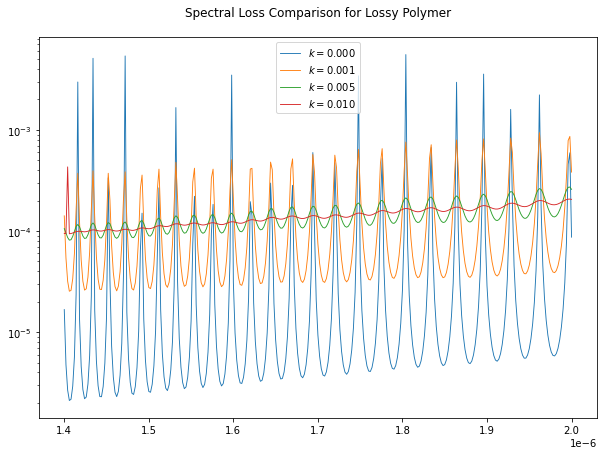

In [13]:
plt.figure(figsize=(10,7))
plt.plot(wls, B1, label='$k = 0.000$', linewidth=.9)
plt.plot(wls, B2, label='$k=0.001$', linewidth=.9)
plt.plot(wls, B3, label='$k=0.005$', linewidth=.9)
plt.plot(wls, B4, label='$k=0.010$', linewidth=.9)
plt.legend()
plt.title("Spectral Loss Comparison for Lossy Polymer\n")
plt.yscale('log')

In [22]:
b1 = 20 / np.log(10) * np.load('data/no_loss_betas.npy')/A.scale
b2 = 20 / np.log(10) * np.load('data/low_loss_betas.npy')/A.scale
b3 = 20 / np.log(10) * np.load('data/med_loss_betas.npy')/A.scale
b4 = 20 / np.log(10) * np.load('data/high_loss_betas.npy')/A.scale

In [31]:
n0 = np.load('data/N0_betas.npy')

N0 = 20/np.log(10)*n0/A.scale

In [8]:
plt.figure(figsize=(10,7))
plt.plot(wls, N0, label='N0', linewidth=1)
plt.plot(wls, b1, label='no loss', linewidth=.9)
plt.plot(wls, b2, label='low loss', linewidth=.9)
plt.plot(wls, b3, label='medium loss', linewidth=.9)
plt.plot(wls, b4, label='high loss', linewidth=.9)
plt.legend()
plt.title("Spectral Loss Comparison for Lossy Polymer\n")
plt.yscale('log')

NameError: name 'N0' is not defined

<Figure size 720x504 with 0 Axes>

In [35]:
np.save('data/no_loss_CL', b1)
np.save('data/low_loss_CL', b2)
np.save('data/med_loss_CL', b3)
np.save('data/high_loss_CL', b4)
np.save('data/N0_CL', N0)
